In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf

In [32]:
df = pd.read_csv('data/mammals.csv', index_col=0)
df = df[['Species', 'BodyWt', 'BrainWt']]
df

,Species,BodyWt,BrainWt
1,Africanelephant,6654.000,5712.0
2,Africangiantpouchedrat,1.000,6.6
3,ArcticFox,3.385,44.5
4,Arcticgroundsquirrel,0.920,5.7
5,Asianelephant,2547.000,4603.0
...,...,...,...
58,Treehyrax,2.000,12.3
59,Treeshrew,0.104,2.5
60,Vervet,4.190,58.0
61,Wateropossum,3.500,3.9


In [33]:
df.describe()

,BodyWt,BrainWt
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [34]:
df[['BodyWt', 'BrainWt']].corr()

,BodyWt,BrainWt
BodyWt,1.000000,0.934164
BrainWt,0.934164,1.000000


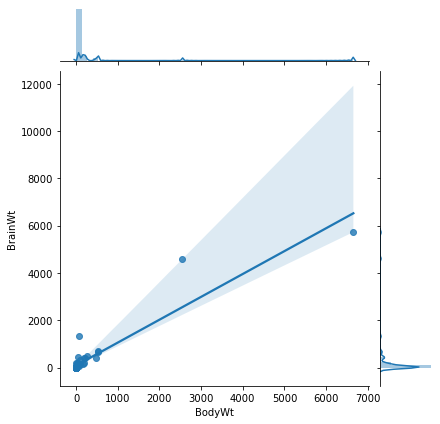

In [35]:
sb.jointplot(data=df, x='BodyWt', y='BrainWt', kind='reg');

In [36]:
# So there some problem in this regression:
# Body and Brain is not in good distribution, very high right skewness, scale range too large, make scatter plot seem 2 outliers
# So first try to re-scale by log, decrease right skewness, try to bring back to normal distribution if they can be
# Then check outliers, still have or not?
# Check if shape like normal distribution, try standard scaler
# If not normal, still be right skewness, try minmax scaler if not have outlier, robust scaler if have outlier

In [37]:
df['Body_log'] = np.log(df['BodyWt'])
df['Brain_log'] = np.log(df['BrainWt'])

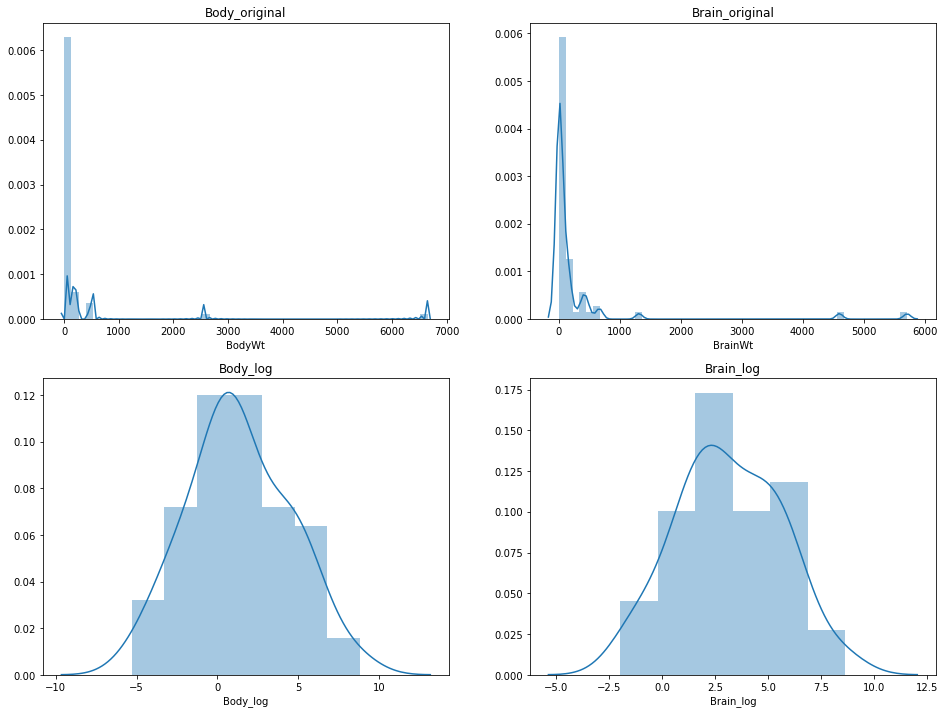

In [38]:
plt.figure(figsize=(16,12))

plt.subplot(2,2,1)
sb.distplot(df['BodyWt'])
plt.title('Body_original')

plt.subplot(2,2,3)
sb.distplot(df['Body_log'])
plt.title('Body_log')

plt.subplot(2,2,2)
sb.distplot(df['BrainWt'])
plt.title('Brain_original')

plt.subplot(2,2,4)
sb.distplot(df['Brain_log'])
plt.title('Brain_log')

plt.show()
# It seem very good shape like normal distribution with rescale by log

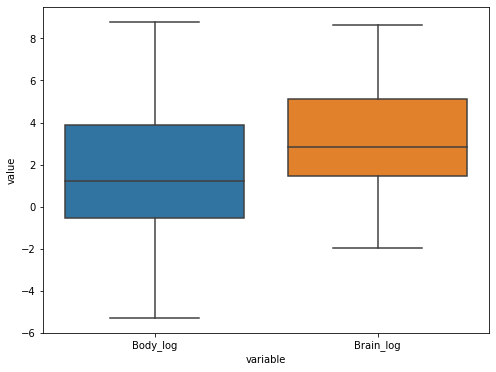

In [39]:
df_boxplot = pd.melt(df[['Body_log', 'Brain_log']])
plt.figure(figsize=(8,6))
sb.boxplot(data=df_boxplot, x='variable', y='value')
plt.show()
# It good, seem no outliers, we can use standard scaler to bring Gaussian Normal Distribution

<Figure size 864x576 with 0 Axes>

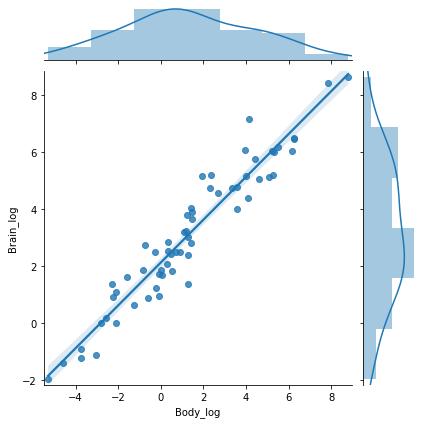

In [40]:
plt.figure(figsize=(12,8))
sb.jointplot(data=df, x='Body_log', y='Brain_log', kind='reg')
plt.xlim([df['Body_log'].min()-0.2, df['Body_log'].max()+0.2])
plt.ylim([df['Brain_log'].min()-0.2, df['Brain_log'].max()+0.2])
plt.show()
# Chart and simple linear regression look perfect

In [41]:
model = smf.ols(formula='Brain_log ~ 1 + Body_log', data=df).fit()
print(model.summary())
# So it seem perfect linear regression result on log

                            OLS Regression Results                            
Dep. Variable:              Brain_log   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     697.4
Date:                Sat, 14 Nov 2020   Prob (F-statistic):           9.84e-35
Time:                        16:14:35   Log-Likelihood:                -64.336
No. Observations:                  62   AIC:                             132.7
Df Residuals:                      60   BIC:                             136.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1348      0.096     22.227      0.0

In [42]:
# Try more to Standard Scaler on this data to see whether improvement or not?
df[['Body_norm', 'Brain_norm']] = StandardScaler().fit_transform(df[['Body_log', 'Brain_log']])
df

,Species,BodyWt,BrainWt,Body_log,Brain_log,Body_norm,Brain_norm
1,Africanelephant,6654.000,5712.0,8.802973,8.650325,2.409885,2.270624
2,Africangiantpouchedrat,1.000,6.6,0.000000,1.887070,-0.431765,-0.516392
3,ArcticFox,3.385,44.5,1.219354,3.795489,-0.038151,0.270034
4,Arcticgroundsquirrel,0.920,5.7,-0.083382,1.740466,-0.458681,-0.576804
5,Asianelephant,2547.000,4603.0,7.842671,8.434464,2.099894,2.181671
...,...,...,...,...,...,...,...
58,Treehyrax,2.000,12.3,0.693147,2.509599,-0.208013,-0.259858
59,Treeshrew,0.104,2.5,-2.263364,0.916291,-1.162392,-0.916432
60,Vervet,4.190,58.0,1.432701,4.060443,0.030719,0.379216
61,Wateropossum,3.500,3.9,1.252763,1.360977,-0.027366,-0.733185


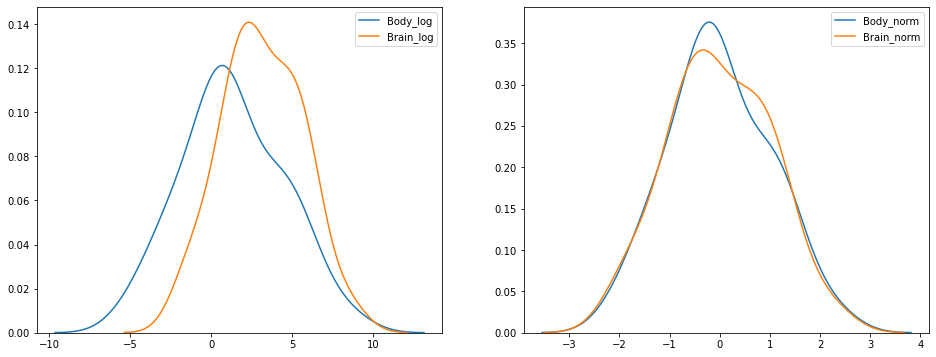

In [43]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sb.kdeplot(df['Body_log'])
sb.kdeplot(df['Brain_log'])
plt.subplot(1,2,2)
sb.kdeplot(df['Body_norm'])
sb.kdeplot(df['Brain_norm'])
plt.show()

<Figure size 864x576 with 0 Axes>

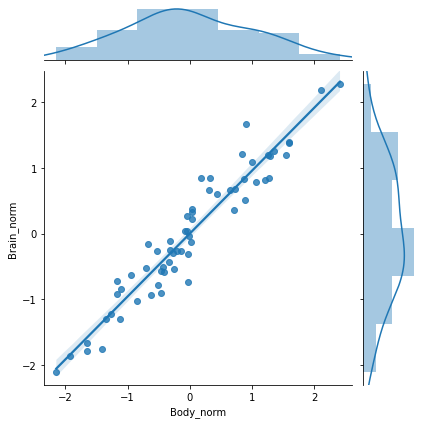

In [44]:
plt.figure(figsize=(12,8))
sb.jointplot(data=df, x='Body_norm', y='Brain_norm', kind='reg')
plt.xlim([df['Body_norm'].min()-0.2, df['Body_norm'].max()+0.2])
plt.ylim([df['Brain_norm'].min()-0.2, df['Brain_norm'].max()+0.2])
plt.show()
# Chart and simple linear regression look perfect

In [45]:
model2 = smf.ols(formula='Brain_norm ~ 1 + Body_norm', data=df).fit()
print(model2.summary())
# So result nearly like use only log data

                            OLS Regression Results                            
Dep. Variable:             Brain_norm   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     697.4
Date:                Sat, 14 Nov 2020   Prob (F-statistic):           9.84e-35
Time:                        16:14:37   Log-Likelihood:                -9.3714
No. Observations:                  62   AIC:                             22.74
Df Residuals:                      60   BIC:                             27.00
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    2.22e-16      0.036   6.11e-15      1.0

In [104]:
# Try more to Standard Scaler on this data to see whether improvement or not?
stan_scaler = StandardScaler()
train, test = train_test_split(df, test_size=0.4, random_state=1)
train[['Body_norm2', 'Brain_norm2']] = stan_scaler.fit_transform(train[['Body_log', 'Brain_log']])
# test[['Body_norm2', 'Brain_norm2']] = stan_scaler.transform(test[['Body_log', 'Brain_log']])
X_train = train['Body_norm2'].values.reshape(-1,1)
y_train = train['Brain_norm2']
X_test = test['Body_log'].values.reshape(-1,1)
y_test = test['Brain_log']
# X_test = test['Body_norm2'].values.reshape(-1,1)
# y_test = test['Brain_norm2']
lm_model = LinearRegression().fit(X_train, y_train)
y_pred = lm_model.predict(X_test)
lm_model.score(X_test, y_test)
# r2_score(y_pred, y_test)
# model2 = smf.ols(formula='Brain_norm2 ~ 1 + Body_norm2', data=train).fit()
# print(model2.summary())
# -1.35134

-0.2826448615267976

In [105]:
pd.DataFrame(np.c_[np.exp(y_pred), test['BrainWt']], columns=['Pred', 'Real'])

,Pred,Real
0,24.725667,115.00
1,13.538835,98.20
2,1.669801,6.30
3,73.155216,325.00
4,3.248409,44.50
5,0.492049,15.50
6,3.354981,3.90
7,0.757324,12.30
8,1.336384,8.10
9,160.758465,180.00


In [106]:
# Try more to Standard Scaler on this data to see whether improvement or not?
stan_scaler = StandardScaler()
train, test = train_test_split(df, test_size=0.4, random_state=1)
train[['Body_norm2', 'Brain_norm2']] = stan_scaler.fit_transform(train[['Body_log', 'Brain_log']])
test[['Body_norm2', 'Brain_norm2']] = stan_scaler.transform(test[['Body_log', 'Brain_log']])
X_train = train['Body_norm2'].values.reshape(-1,1)
y_train = train['Brain_norm2']
# X_test = test['BodyWt'].values.reshape(-1,1)
# y_test = test['BrainWt']
X_test = test['Body_norm2'].values.reshape(-1,1)
y_test = test['Brain_norm2']
lm_model = LinearRegression().fit(X_train, y_train)
y_pred = lm_model.predict(X_test)
y_pred_log = stan_scaler.inverse_transform(np.c_[X_test,y_pred])[:,1]
lm_model.score(X_test, y_test)
# r2_score(y_pred, y_test)
# model2 = smf.ols(formula='Brain_norm2 ~ 1 + Body_norm2', data=train).fit()
# print(model2.summary())
# -1.35134

0.874490537559712

In [107]:
pd.DataFrame(np.c_[np.exp(y_pred_log), test['BrainWt']], columns=['Pred', 'Real'])

,Pred,Real
0,106.372883,115.00
1,65.471260,98.20
2,12.123043,6.30
3,254.952181,325.00
4,20.725433,44.50
5,4.528863,15.50
6,21.271634,3.90
7,6.410631,12.30
8,10.131186,8.10
9,480.836626,180.00


In [71]:
# Try more to Standard Scaler on this data to see whether improvement or not?
stan_scaler = StandardScaler()
train, test = train_test_split(df, test_size=0.2, random_state=1)
train[['Body_norm2', 'Brain_norm2']] = stan_scaler.fit_transform(train[['BodyWt', 'BrainWt']])
test[['Body_norm2', 'Brain_norm2']] = stan_scaler.transform(test[['BodyWt', 'BrainWt']])
X_train = train['Body_norm2'].values.reshape(-1,1)
y_train = train['Brain_norm2']
# X_test = test['BodyWt'].values.reshape(-1,1)
# y_test = test['BrainWt']
X_test = test['Body_norm2'].values.reshape(-1,1)
y_test = test['Brain_norm2']
lm_model = LinearRegression().fit(X_train, y_train)
y_pred = lm_model.predict(X_test)
lm_model.score(X_test, y_test)
# r2_score(y_pred, y_test)
# model2 = smf.ols(formula='Brain_norm2 ~ 1 + Body_norm2', data=train).fit()
# print(model2.summary())
# -1.35134

0.074642807031292

In [77]:
y_pred_log

array([[ 3.31998733,  4.63679708],
       [ 2.69665216,  4.16041839],
       [ 0.53062825,  2.50505273],
       [ 4.44265126,  5.4947836 ],
       [ 1.21935391,  3.03140555],
       [-0.73396918,  1.53859471],
       [ 1.25276297,  3.05693815],
       [-0.28768207,  1.8796659 ],
       [ 0.30010459,  2.32887695],
       [ 5.25749537,  6.11752141],
       [ 2.30258509,  3.85925593],
       [ 1.25276297,  3.05693815],
       [-2.29263476,  0.34739757]])